<a href="https://colab.research.google.com/github/MingChin100/python-ML/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test)= load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 5


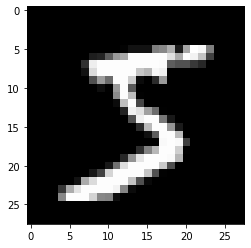

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
      Dense(128, activation="relu", input_dim=784),
      Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import to_categorical
# num_classes 多個類別編號
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.4322 - accuracy: 0.8833 - val_loss: 0.1954 - val_accuracy: 0.9485
Epoch 2/50
270/270 - 1s - loss: 0.1975 - accuracy: 0.9432 - val_loss: 0.1388 - val_accuracy: 0.9650
Epoch 3/50
270/270 - 1s - loss: 0.1437 - accuracy: 0.9591 - val_loss: 0.1144 - val_accuracy: 0.9703
Epoch 4/50
270/270 - 1s - loss: 0.1134 - accuracy: 0.9670 - val_loss: 0.1004 - val_accuracy: 0.9713
Epoch 5/50
270/270 - 1s - loss: 0.0923 - accuracy: 0.9737 - val_loss: 0.0902 - val_accuracy: 0.9768
Epoch 6/50
270/270 - 1s - loss: 0.0771 - accuracy: 0.9780 - val_loss: 0.0840 - val_accuracy: 0.9770
Epoch 7/50
270/270 - 1s - loss: 0.0659 - accuracy: 0.9815 - val_loss: 0.0824 - val_accuracy: 0.9765
Epoch 8/50
270/270 - 1s - loss: 0.0578 - accuracy: 0.9836 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 9/50
270/270 - 1s - loss: 0.0492 - accuracy: 0.9868 - val_loss: 0.0802 - val_accuracy: 0.9767
Epoch 10/50
270/270 - 1s - loss: 0.0433 - accuracy: 0.9884 - val_loss: 0.0774 - val_accuracy: 0.9780

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9767


[0.07633425295352936, 0.9767000079154968]

In [ ]:
# model.save("mlp.h5")
# HDFView
from tensorflow.keras.models import load_model
loaded = load_model("mnist.h5")
# 不需要:compile 可以: fit/evaluate/predict
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9767


[0.07633425295352936, 0.9767000079154968]

In [ ]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(i) for i in range(10)],
       columns=["{}(預測)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),970,0,0,2,0,2,3,1,1,1
1(真實),0,1125,2,2,0,1,2,0,3,0
2(真實),4,2,1011,1,2,0,3,3,6,0
3(真實),0,0,6,983,0,3,0,6,8,4
4(真實),2,0,2,1,959,0,6,1,1,10
5(真實),4,0,0,12,2,860,7,2,3,2
6(真實),5,2,1,1,1,3,942,0,3,0
7(真實),2,0,7,3,3,0,0,1004,3,6
8(真實),5,0,2,11,4,4,2,4,939,3
9(真實),2,3,0,10,6,4,1,5,4,974


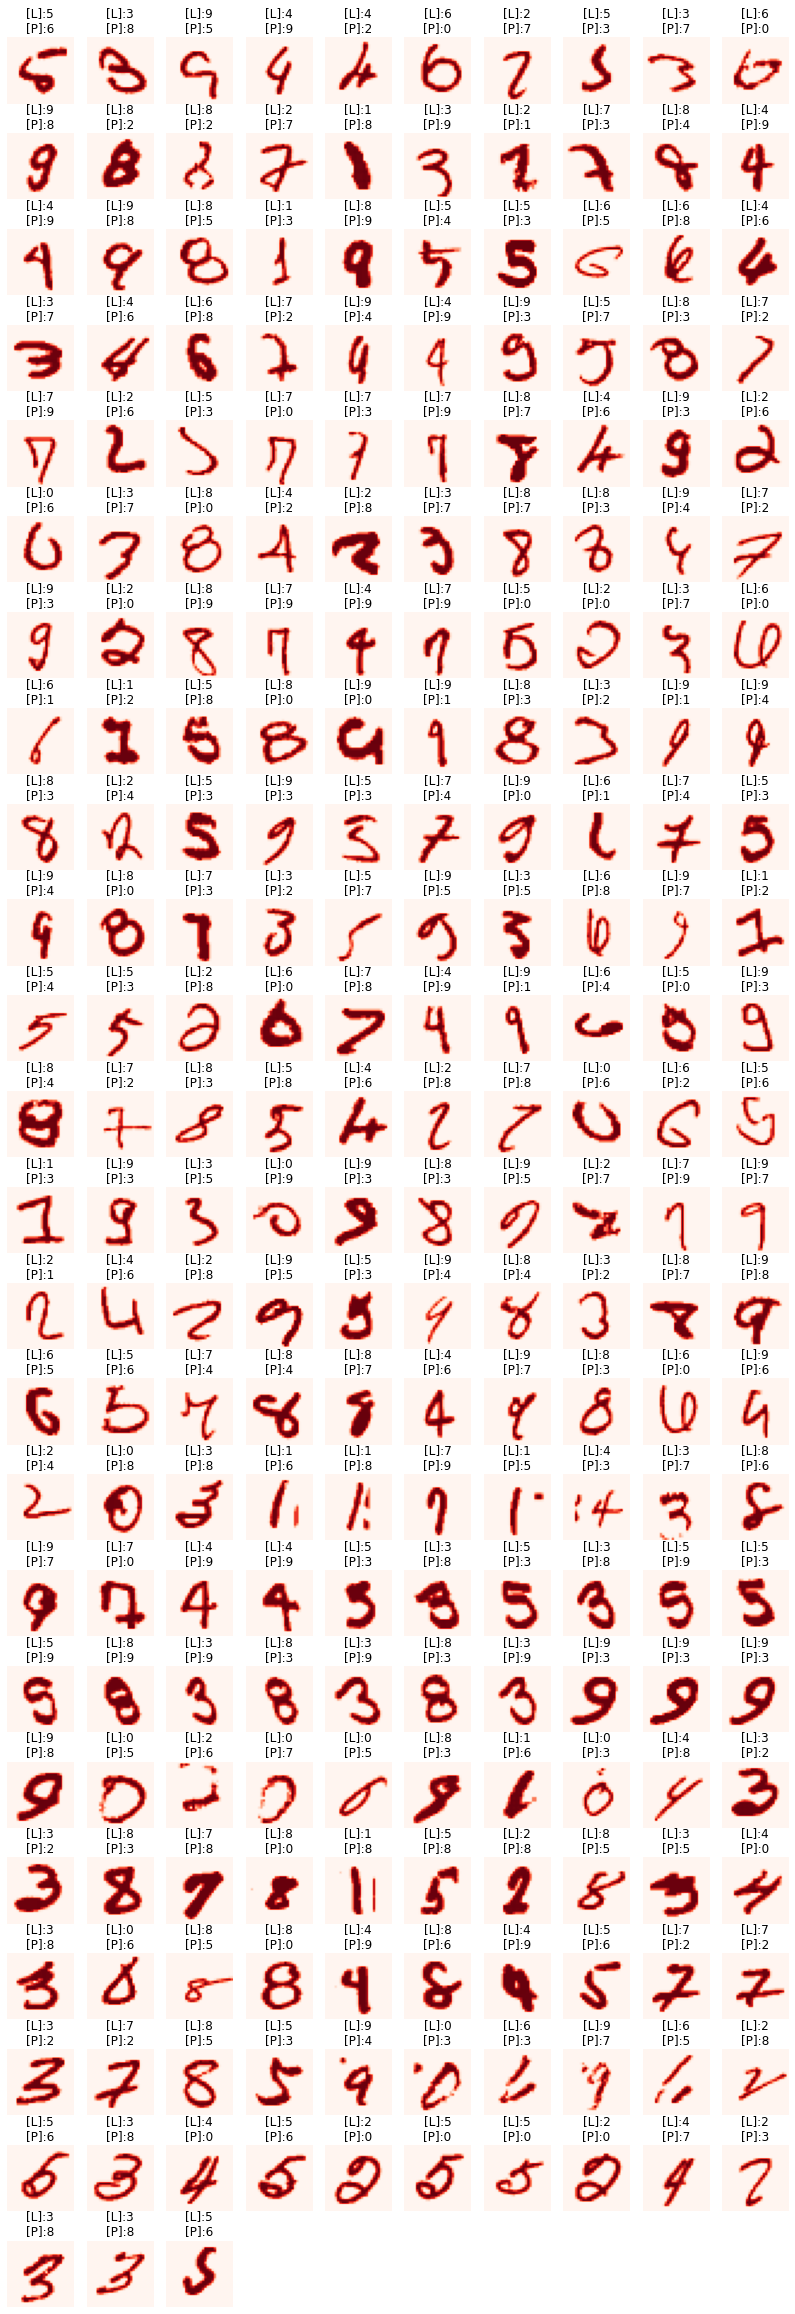

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(label, p)
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Reds")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")